In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
import os
from PIL import Image

      Tiempo (s)  Voltaje (V)
0       0.180000    20.400000
1       0.190000    20.000000
2       0.200000    19.600000
3       0.210000    19.200001
4       0.220000    19.000000
...          ...          ...
2229   22.469999     9.400001
2230   22.480000     9.200000
2231   22.490000     8.800000
2232   22.500000     8.600000
2233   22.510000     8.200000

[2234 rows x 2 columns]
11.424454767768337 -10.086445887012376 0.018915549252625487 5.417958861999778 2.659507549746532
[2.30057992e-03 7.38189568e-03 6.28141288e-05 6.15129656e-05
 7.17958906e-04]


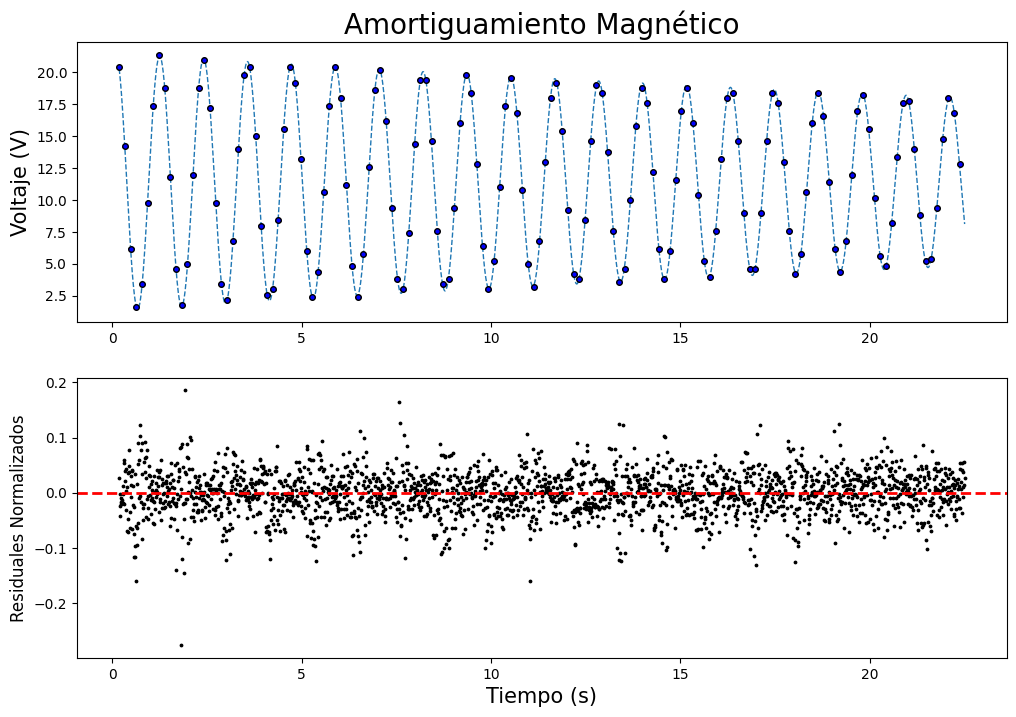

      Tiempo (s)  Voltaje (V)
0       0.180000          0.0
1       0.190000          0.2
2       0.200000          0.6
3       0.210000          0.8
4       0.220000          1.2
...          ...          ...
2188   22.059999          7.0
2189   22.070000          7.0
2190   22.080000          6.8
2191   22.090000          7.0
2192   22.100000          6.6

[2193 rows x 2 columns]
11.4351957071626 11.849322410090956 0.03806690518483451 -5.4181710431394725 -15.012663678468604
[2.39485428e-03 8.41793233e-03 7.00898348e-05 6.92753106e-05
 7.01667354e-04]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


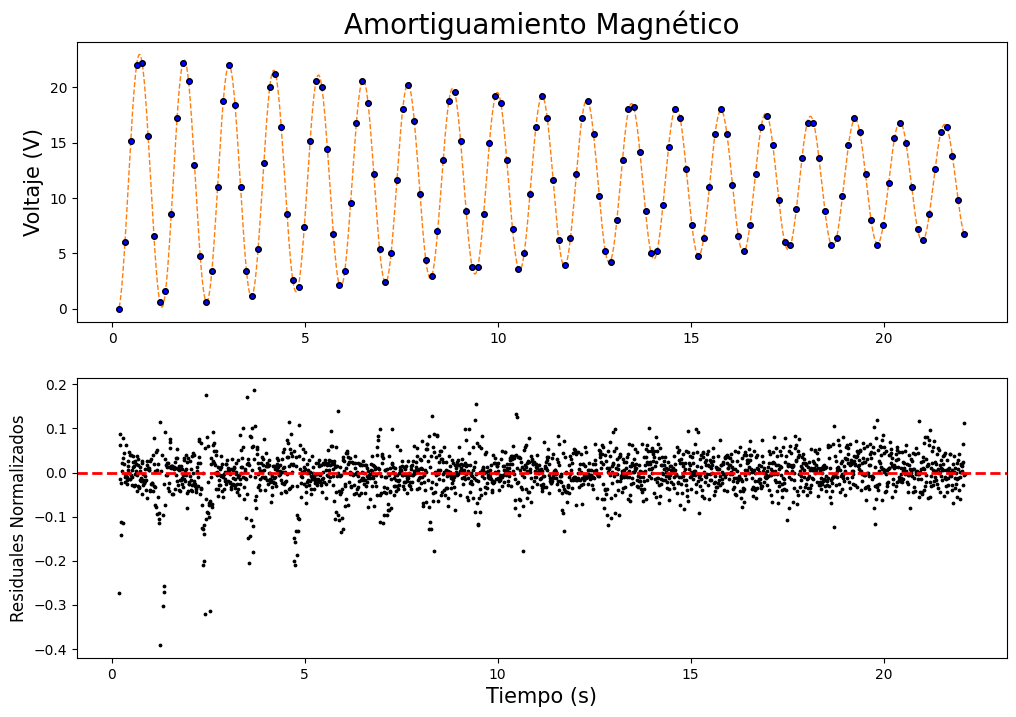

      Tiempo (s)  Voltaje (V)
0       0.072000         17.6
1       0.076000         17.4
2       0.080000         17.6
3       0.084000         17.4
4       0.088000         17.0
...          ...          ...
1952    7.880001         14.8
1953    7.884000         14.8
1954    7.888000         14.8
1955    7.892000         14.8
1956    7.896000         14.8

[1957 rows x 2 columns]
11.453305118162245 -8.446275769329583 0.05536343257416015 5.41895817241577 -2.795879017203299
[0.00241596 0.00795521 0.00023104 0.00021622 0.00088312]


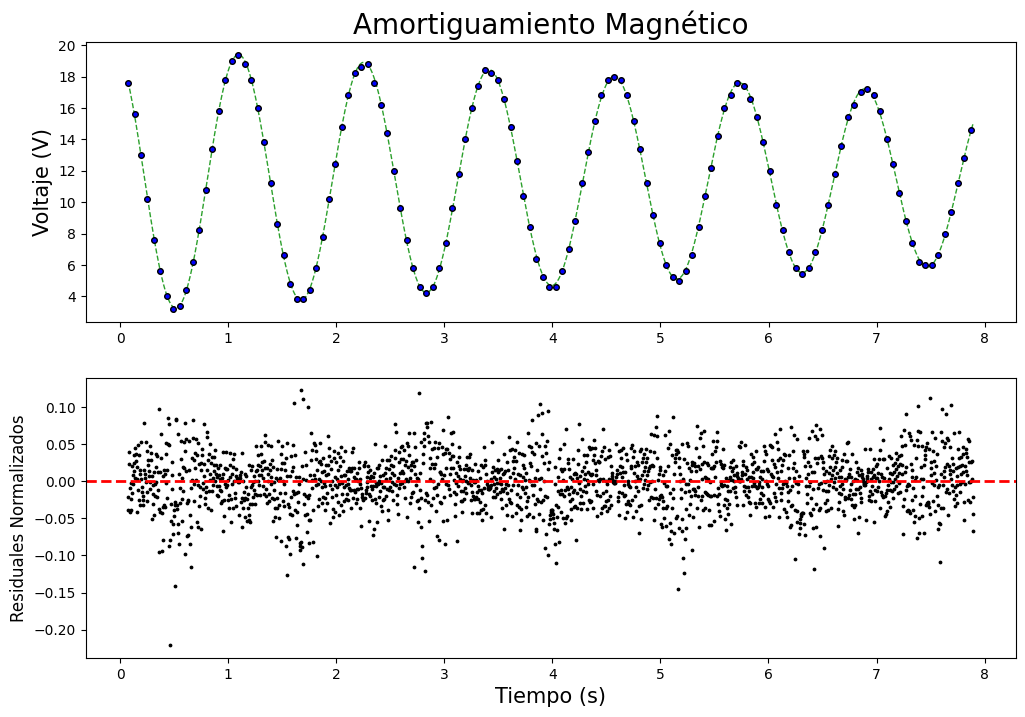

In [67]:
# Carpeta con los CSV
ruta_carpeta = "datos_amortiguamiento" 
archivos_csv = glob.glob(os.path.join(ruta_carpeta, "*.csv"))


marcadores = ["o", "o", "o"]
colores = ["tab:blue", "tab:orange", "tab:green"]

def decaimiento_exponencial(x,V0, V, B, W, C):
    return V0 +  V * np.exp(-B * x) * np.cos(W * x + C)

for idx, archivo in enumerate(archivos_csv):
    nombre = os.path.basename(archivo)

    df = pd.read_csv(archivo)
    col_tiempo = df.columns[3]
    col_volt   = df.columns[4]
    
    df = df[[col_tiempo, col_volt]].copy()
    df.columns = ['Tiempo (s)', 'Voltaje (V)']

    df['Tiempo (s)'] = pd.to_numeric(df['Tiempo (s)'], errors='coerce')
    df['Voltaje (V)'] = pd.to_numeric(df['Voltaje (V)'], errors='coerce')

    x_data = df['Tiempo (s)']
    y_data = df['Voltaje (V)']

    print(df)
    
    fig, ax0 = plt.subplots(2, 1, figsize=(12, 8), sharex=False)
    fig.set_facecolor("white")
    
    #======== Ajuste ========
    popt, pcov = curve_fit(
        decaimiento_exponencial,
        x_data,
        y_data,
        p0=[0, 1, 1, 10, 0],
        )
    y_fit = decaimiento_exponencial(x_data, *popt)
    V0, V, B, W, C = popt
    print(V0, V, B, W, C)
    perr = np.sqrt(np.diag(pcov))
    print(perr)
    residuales = (y_data - decaimiento_exponencial(x_data, *popt)) / np.sqrt(y_data)

    # ======== Gráfica del ajuste ========
    
    ax0[0].errorbar(
        x_data.iloc[::15], y_data.iloc[::15],
        xerr=0.001, yerr=0.01,
        fmt=marcadores[idx], color='b', markersize=4,
        markeredgewidth=1, markeredgecolor='k',
        capsize=2, elinewidth=1, ecolor='k',
        label='Datos'
    )
    ax0[0].plot(
        x_data,
        y_fit,
        color = colores[idx],
        linewidth=1,
        linestyle = '--'
    )
    ax0[0].set_title(f"Amortiguamiento Magnético",fontsize=20)
    ax0[0].set_ylabel("Voltaje (V)",fontsize=15)
    ax0[0].grid(False)

    # ======== Gráfica de residuales ========
    ax0[1].scatter(x_data, residuales, s=3, color="black")
    ax0[1].axhline(0, color="red", linestyle="--", linewidth=2)
    ax0[1].set_ylabel("Residuales Normalizados",fontsize=12)
    ax0[1].set_xlabel("Tiempo (s)",fontsize=15)
    ax0[1].grid(False)

    plt.savefig(f'Amortiguamiento_magnetico{idx}.png',format='png', dpi=300)
    plt.show()

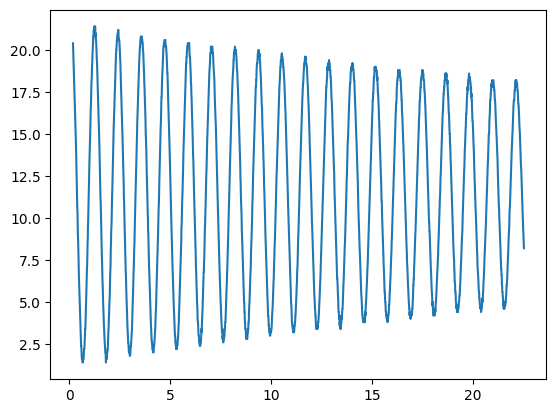

In [25]:
df = pd.read_csv(archivos_csv[0])
col_tiempo = df.columns[3]
col_volt   = df.columns[4]
df = df[[col_tiempo, col_volt]].copy()
df.columns = ['Tiempo (s)', 'Voltaje (V)']
df['Tiempo (s)'] = pd.to_numeric(df['Tiempo (s)'], errors='coerce')
df['Voltaje (V)'] = pd.to_numeric(df['Voltaje (V)'], errors='coerce')
    
plt.plot(df['Tiempo (s)'],df['Voltaje (V)'])